# Mini Project

## Data Analysis

1. Load the car policyholder claim dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('claims_data.csv')
test = pd.read_csv('test.csv')


2. Perform basic exploratory data analysis to gain insights into the dataset.

In [2]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(train.head())

# Get the shape of the dataset (number of rows, number of columns)
print("\nDataset train shape: " + str(train.shape))
print("\nDataset test shape: " + str(test.shape))

# Get information about the columns, data types, and non-null values
print("\nDataset info:")
print(train.info())

First few rows of the dataset:
  policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  ... is_brake_assist  \
0                4990     1       A    M1       CNG  ...              No   
1               27003     1       A    M1       CNG  ...              No   
2                4076     1       A    M1       CNG  ...              No   
3               21622     1      C1    M2    Petrol  ...             Yes   
4               34738     2       A    M3    Petrol  ...              No   

  is_power_door_locks is_central_locking  is_power_stee

3. Analyse the distribution of features, identify any missing values, and handle them
appropriately.

In [3]:
# Summary statistics for numerical columns
print("\nSummary statistics:")
print(train.describe())

# Count of missing values in each column
print("\nMissing values in train dataset:")
train.isnull().sum(),


Summary statistics:
       policy_tenure    age_of_car  age_of_policyholder  population_density  \
count   58592.000000  58592.000000         58592.000000        58592.000000   
mean        0.611246      0.069424             0.469420        18826.858667   
std         0.414156      0.056721             0.122886        17660.174792   
min         0.002735      0.000000             0.288462          290.000000   
25%         0.210250      0.020000             0.365385         6112.000000   
50%         0.573792      0.060000             0.451923         8794.000000   
75%         1.039104      0.110000             0.548077        27003.000000   
max         1.396641      1.000000             1.000000        73430.000000   

               make       airbags  displacement      cylinder      gear_box  \
count  58592.000000  58592.000000  58592.000000  58592.000000  58592.000000   
mean       1.763722      3.137066   1162.355851      3.626963      5.245443   
std        1.136988      1.832

(policy_id                           0
 policy_tenure                       0
 age_of_car                          0
 age_of_policyholder                 0
 area_cluster                        0
 population_density                  0
 make                                0
 segment                             0
 model                               0
 fuel_type                           0
 max_torque                          0
 max_power                           0
 engine_type                         0
 airbags                             0
 is_esc                              0
 is_adjustable_steering              0
 is_tpms                             0
 is_parking_sensors                  0
 is_parking_camera                   0
 rear_brakes_type                    0
 displacement                        0
 cylinder                            0
 transmission_type                   0
 gear_box                            0
 steering_type                       0
 turning_radius          

In [4]:
print("\nMissing values in test dataset:")
test.isnull().sum()


Missing values in test dataset:


policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [5]:
print("\nNumber of duplicate rows in train dataset: " + str(train.duplicated().sum()))

print("\nNumber of duplicate rows in test dataset: " + str(test.duplicated().sum()))


Number of duplicate rows in train dataset: 0

Number of duplicate rows in test dataset: 0


4. Explore relationships between features and the claim status (is_claim).

In [6]:
# Calculate the average policy tenure for different claim statuses
claim_status_avg_policy_tenure = train.groupby('is_claim')['policy_tenure'].mean()
print("Average policy tenure for different claim statuses:")
print(claim_status_avg_policy_tenure)

# Calculate the average age of car for different claim statuses
claim_status_avg_age_of_car = train.groupby('is_claim')['age_of_car'].mean()
print("\nAverage age of car for different claim statuses:")
print(claim_status_avg_age_of_car)

# Calculate the average age of policyholder for different claim statuses
claim_status_avg_age_of_policyholder = train.groupby('is_claim')['age_of_policyholder'].mean()
print("\nAverage age of policyholder for different claim statuses:")
print(claim_status_avg_age_of_policyholder)

# Calculate the count of claim statuses for each area cluster
claim_status_area_cluster_count = train.groupby('area_cluster')['is_claim'].value_counts()
print("\nCount of claim statuses for each area cluster:")
print(claim_status_area_cluster_count)

# Calculate the count of claim statuses for each area cluster
claim_status_model_count = train.groupby('model')['is_claim'].value_counts()
print("\nCount of claim statuses for each model:")
print(claim_status_model_count)

# Calculate the median population density for different claim statuses
claim_status_median_population_density = train.groupby('is_claim')['population_density'].median()
print("\nMedian population density for different claim statuses:")
print(claim_status_median_population_density)

# Calculate the count of claim statuses for each make
claim_status_make_count = train.groupby('make')['is_claim'].value_counts()
print("\nCount of claim statuses for each make:")
print(claim_status_make_count)

Average policy tenure for different claim statuses:
is_claim
0    0.602720
1    0.736002
Name: policy_tenure, dtype: float64

Average age of car for different claim statuses:
is_claim
0    0.069841
1    0.063311
Name: age_of_car, dtype: float64

Average age of policyholder for different claim statuses:
is_claim
0    0.468699
1    0.479966
Name: age_of_policyholder, dtype: float64

Count of claim statuses for each area cluster:
area_cluster  is_claim
C1            0            1392
              1              76
C10           0            3007
              1             148
C11           0            1140
              1              72
C12           0            1502
              1              87
C13           0            3228
              1             195
C14           0            3379
              1             281
C15           0             733
              1              38
C16           0             378
              1              23
C17           0             473
  

In [7]:
train['is_claim'].value_counts()/train.shape[0]*100
# Result show imbalanzed data

0    93.603222
1     6.396778
Name: is_claim, dtype: float64

## Data Visualisation

1. Create visualisations to explore relationships between features and the claim status.

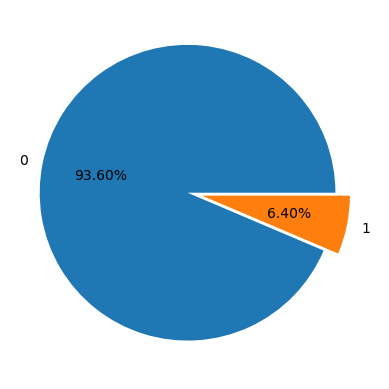

In [8]:
# Pie based on current claim
plt.pie(train['is_claim'].value_counts(),labels = train['is_claim'].value_counts().index.tolist(), autopct='%1.2f%%',explode=[0.05]*2)
plt.show()

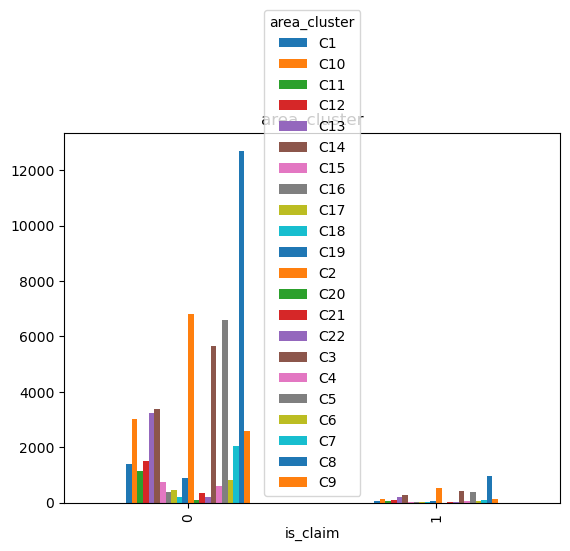

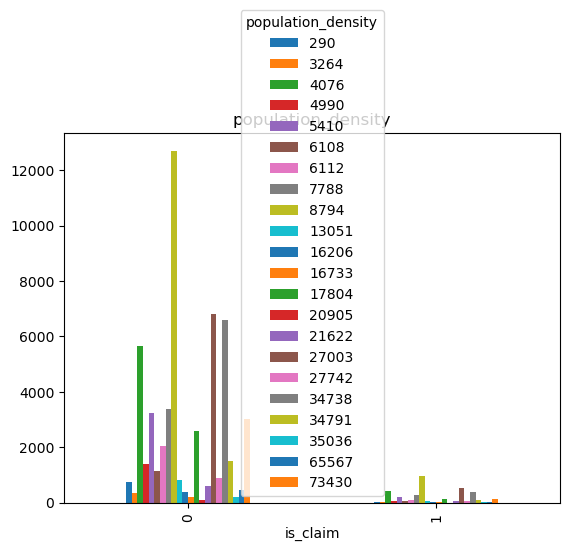

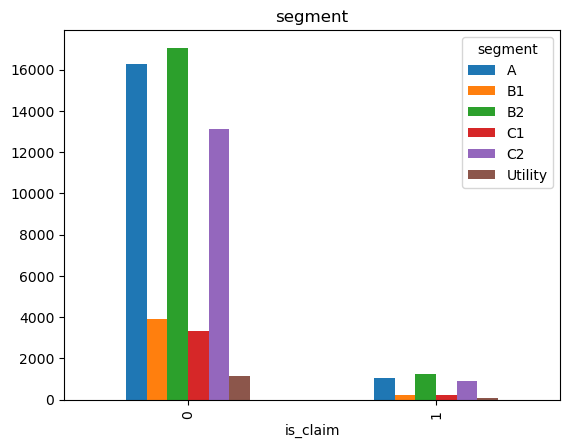

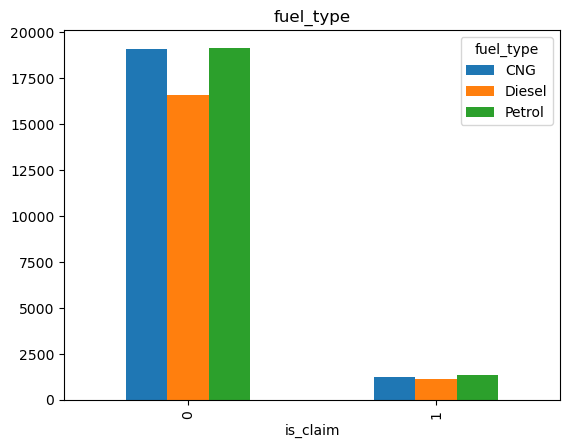

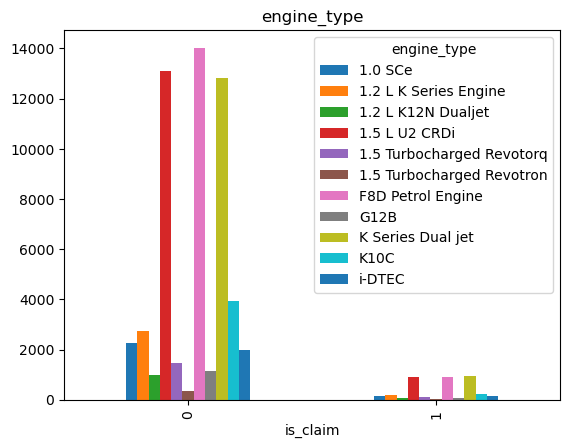

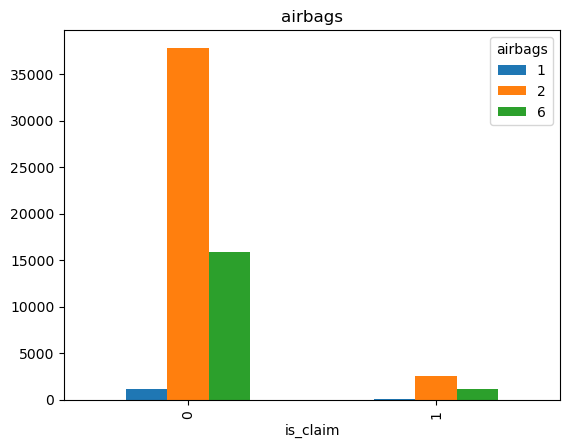

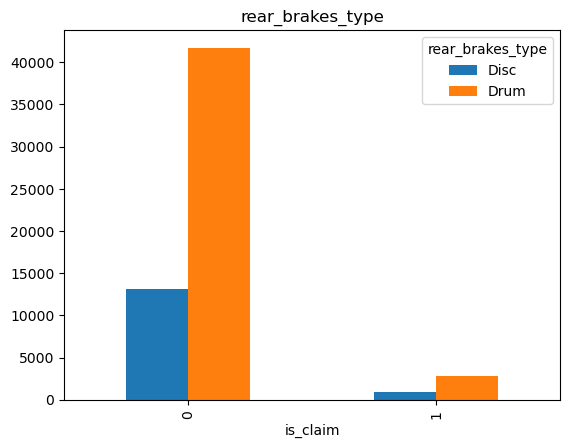

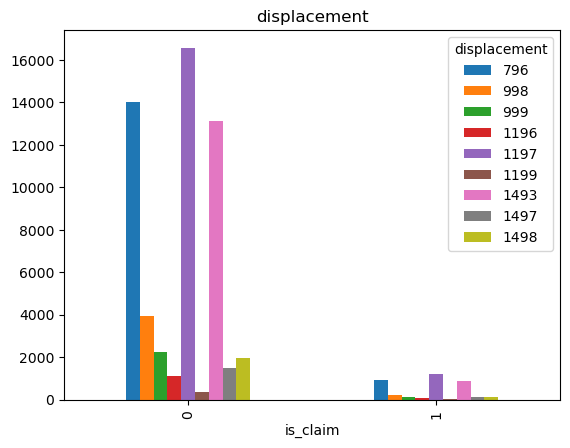

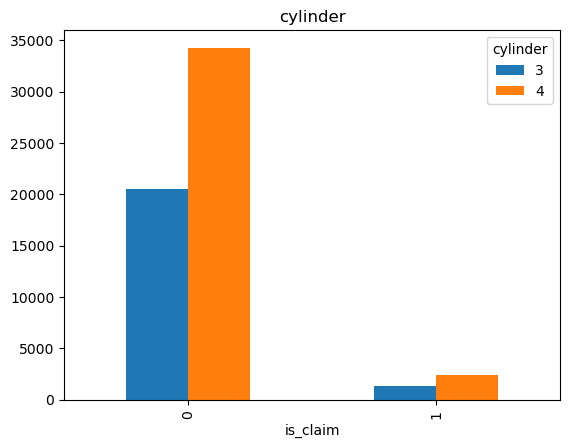

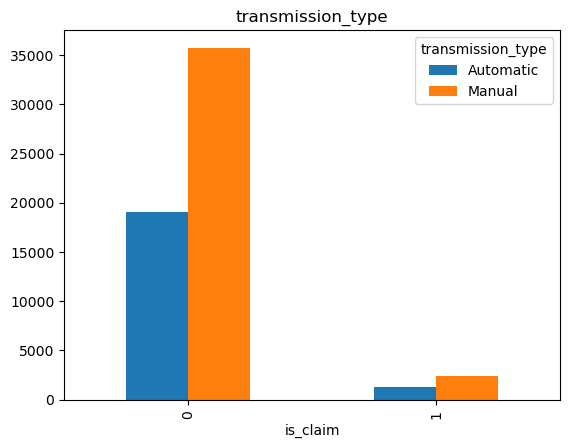

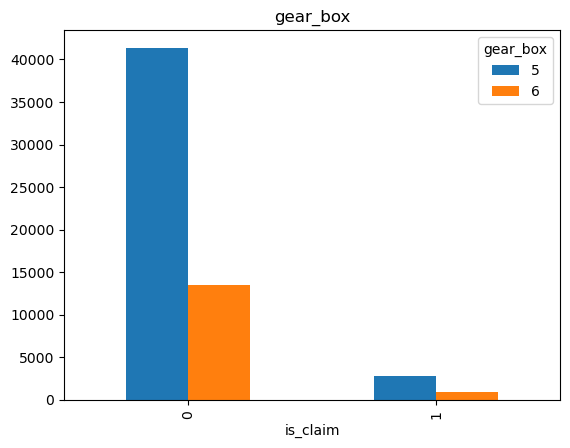

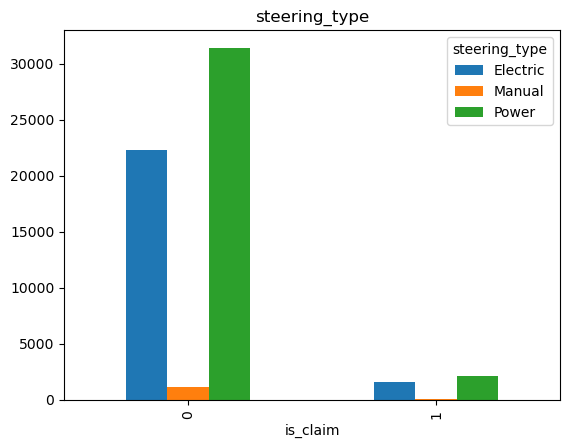

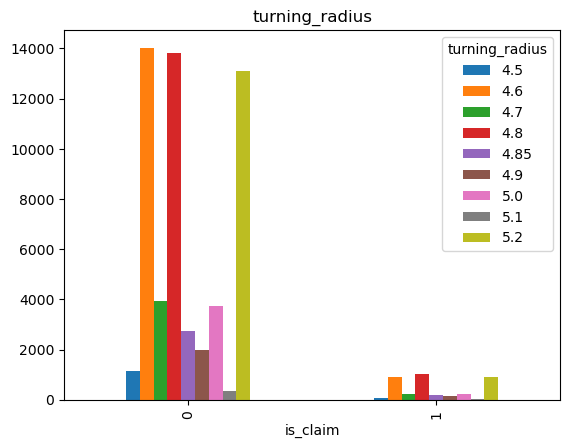

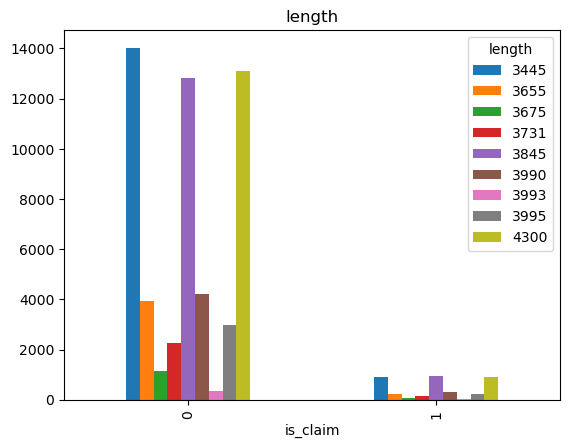

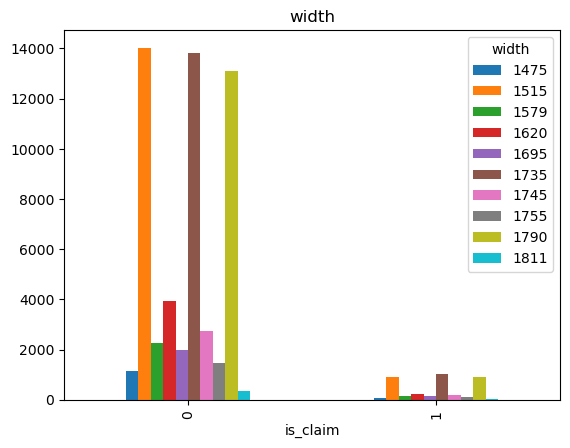

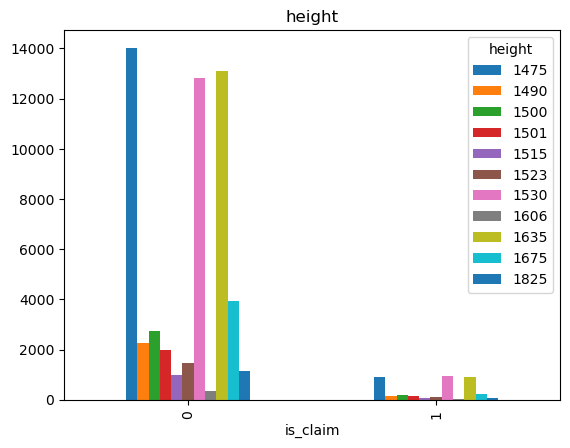

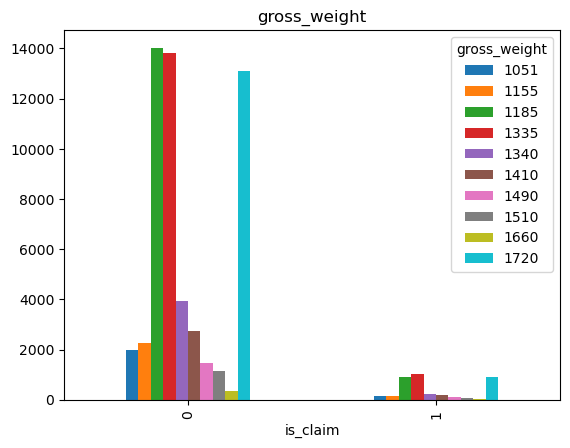

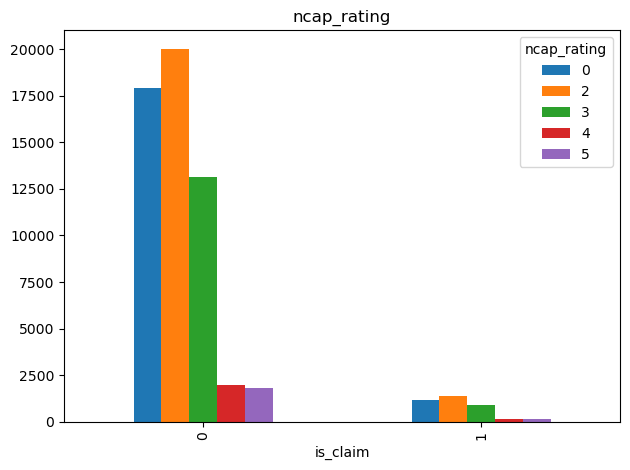

In [9]:
features=['area_cluster', 'population_density', 'segment',
       'fuel_type', 'engine_type', 'airbags','rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight','ncap_rating']


for i in  features:
    pd.crosstab(train.is_claim,train[i]).plot(kind='bar')
    plt.title(i)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Data Preprocessing

1. Perform necessary preprocessing steps such as hot encoding categorical variables and scaling numeric features by computing its z-score:

In [12]:
# Drop unimportant feature that doesn't affect the prediction
# Determine independant & dependant variable
X=train.drop(columns=['policy_id','is_claim',"area_cluster","make","model","fuel_type","airbags","cylinder"])
y=train['is_claim']

In [13]:
policy_id=test['policy_id']
test=test.drop(columns=['policy_id',"area_cluster","make","model","fuel_type","airbags","cylinder"])

In [14]:
X.shape, test.shape

((58592, 36), (39063, 36))

In [15]:
# Hot encoding categorical variables
X=pd.get_dummies(X,drop_first=True)
test=pd.get_dummies(test,drop_first=True)

In [16]:
X.shape, test.shape

((58592, 64), (39063, 64))

In [17]:
# RandomOverSampler to handle imbalanced data
# Only involve X & y from train set

from imblearn.over_sampling import RandomOverSampler

In [18]:
os =  RandomOverSampler(random_state=42, sampling_strategy=0.8)
X_resample, y_resample = os.fit_resample(X, y)

In [19]:
X_resample.shape,y_resample.shape

((98719, 64), (98719,))

In [20]:
# Feature Scaling data using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_resample=scaler.fit_transform(X_resample)
test=scaler.transform(test)

In [21]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_resample)))

Original dataset shape Counter({0: 54844, 1: 3748})
Resampled dataset shape Counter({0: 54844, 1: 43875})


2. Split the dataset into training and testing sets (70 : 30 ratio) using train_test_split() function.

In [22]:
from sklearn.model_selection import train_test_split

# Split claims_data.csv to Test-Train
# 70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X_resample,y_resample,test_size = 0.3, random_state = 1)
 

## Modelling

Linear Kernel with Default Hyperparameter

In [23]:
# Linear SVC
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define classifier
lclf = SVC(kernel='linear')

# Training model
lclf.fit(X_train, y_train)

# Testing set performance
test_preds = lclf.predict(X_test)
test_accuracy = lclf.score(X_test, y_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification accuracy: %.4f \n" % test_accuracy)
print(classification_report(y_test, test_preds))

Classification accuracy: 0.5840 

              precision    recall  f1-score   support

           0       0.62      0.64      0.63     16519
           1       0.53      0.51      0.52     13097

    accuracy                           0.58     29616
   macro avg       0.58      0.58      0.58     29616
weighted avg       0.58      0.58      0.58     29616



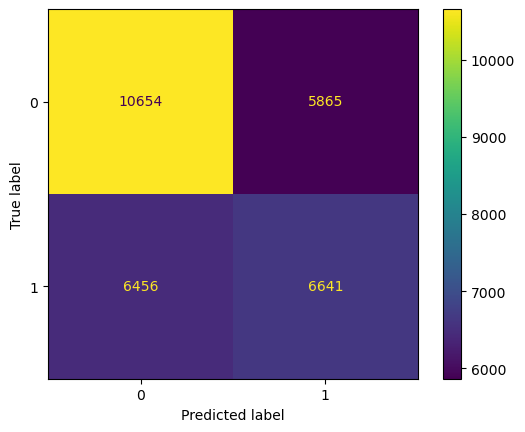

In [25]:
# Confusion matrix
# plot confusion matrix
cm = confusion_matrix(y_test, test_preds, labels=lclf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lclf.classes_)
disp.plot()

Non-linear kernel with Default Hyperparameter

In [26]:
# Non-linear SVC

# Define classifier
clf = SVC(kernel='rbf')

# Training model
clf.fit(X_train, y_train)

# Testing set performance
preds = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)

In [27]:
print("Classification accuracy: %.4f \n" % accuracy)
print(classification_report(y_test, preds))

Classification accuracy: 0.5890 

              precision    recall  f1-score   support

           0       0.60      0.78      0.68     16519
           1       0.56      0.35      0.43     13097

    accuracy                           0.59     29616
   macro avg       0.58      0.56      0.55     29616
weighted avg       0.58      0.59      0.57     29616



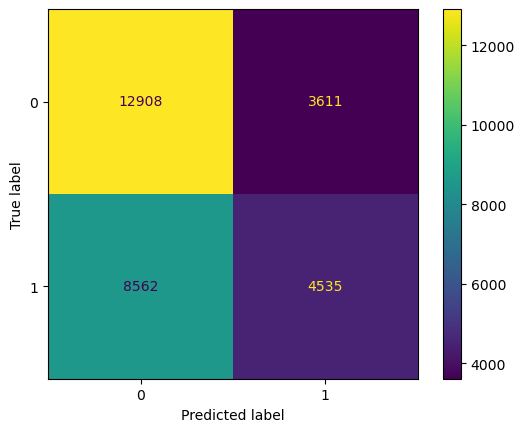

In [28]:
cm = confusion_matrix(y_test, preds, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

## Hyperparameter Tuning

Manually set the C=100 and gamma=auto to observe the changes

In [29]:
# Non-linear SVC with C=100

# Define classifier
clf = SVC(kernel='rbf', C=100.0)

# Training model
clf.fit(X_train, y_train)

# Testing set performance
preds = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)

In [30]:
print('Model accuracy score with rbf kernel and C=100.0 : %.4f \n' % accuracy)
print(classification_report(y_test, preds))

Model accuracy score with rbf kernel and C=100.0 : 0.6152 

              precision    recall  f1-score   support

           0       0.65      0.66      0.66     16519
           1       0.57      0.56      0.56     13097

    accuracy                           0.62     29616
   macro avg       0.61      0.61      0.61     29616
weighted avg       0.61      0.62      0.61     29616



Using GridSearchCV to try every hyperparameter combinations & find optimal hyperparameter.

5 C value <br>
7 Gamma value <br>
35 combination x 5 folds = 175 combinations

In [31]:
# Optimize hyperparameter tuning using GridSearch

from sklearn.model_selection import GridSearchCV, KFold

# Define paramater range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001, 1e-5], 'kernel': ['rbf']}

kf = KFold(n_splits=5)
grid = GridSearchCV(SVC(), param_grid, refit= True, verbose= 3, scoring="accuracy", cv=kf)

# Fit the  training model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.691 total time=10.1min
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.687 total time=10.1min
[CV 3/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.683 total time=10.3min
[CV 4/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.692 total time=10.3min
[CV 5/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.697 total time=10.3min
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.635 total time= 7.2min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.644 total time= 7.1min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.634 total time= 7.1min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.631 total time= 7.0min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.646 total time= 7.1min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.592 total time= 7.5min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [32]:
# Print best parameter after tuning
print(grid.best_params_)
  
# Print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 10, 'kernel': 'rbf'}
SVC(C=1000, gamma=10)


In [33]:
# Print prediction results
grid_predictions = grid.predict(X_test)
accu = grid.score(X_test, y_test)

print("Classification accuracy: %.4f \n" % accu)
print(classification_report(y_test, grid_predictions))

# Accuracy improve from 0.5840 (default hyperparameter) to 0.9457 (optimal hyperparameter C=1000 G=10)

Classification accuracy: 0.9457 

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     16519
           1       0.89      1.00      0.94     13097

    accuracy                           0.95     29616
   macro avg       0.95      0.95      0.95     29616
weighted avg       0.95      0.95      0.95     29616



Perform prediction for test.csv dataset

In [34]:
y_prediction = grid.predict(test)

In [35]:
# Print prediction
print_prediction = pd.DataFrame()
print_prediction['policy_id'] = policy_id
print_prediction['is_claim'] = y_prediction

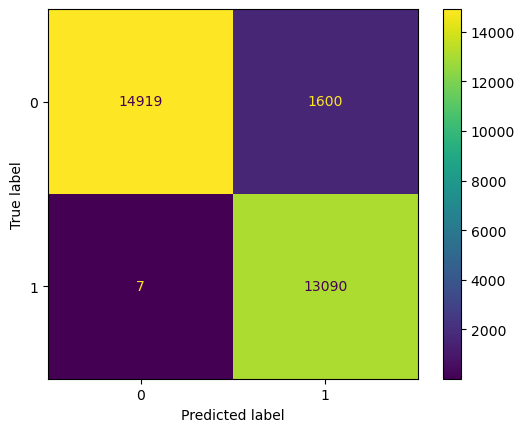

In [36]:
# Confusion matrix for C=1000 & Gamma=10
cm = confusion_matrix(y_test, grid_predictions, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot()

Save output to local csv file

In [39]:
print_prediction.to_csv(r'C:\Users\User\OneDrive\Documents\4. AI\Mini Project - Insurance Claim SVM\source code\latest version\Prediction Result\prediction_result.csv', index=None)

In [40]:
# Display output for test.csv prediction
print_prediction

,policy_id,is_claim
0,ID58593,0
1,ID58594,0
2,ID58595,0
3,ID58596,0
4,ID58597,1
...,...,...
39058,ID97651,0
39059,ID97652,1
39060,ID97653,1
39061,ID97654,0
